In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/Users/ananth/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df = pd.read_csv('Red_Wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df['quality'].unique()
#not a 1-10 scale. Its going to be a 3-8 scale

array([5, 6, 7, 4, 8, 3])

/Users/ananth/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


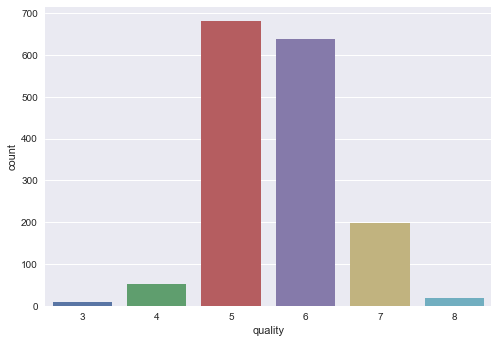

In [7]:
sns.countplot(x='quality', data=df)
#heavy sample set concentration to mid level quality (5s, 6s and 7s).

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#fixed acidity, small variance (7.1 25%, 7.9 50%)..good amt outliers. Same w/volatile acidity
#citric acid: very uniform distribution
#residual sugar: min to max has very high delta. Outliers def could be high
#chlorides: also high min to max. Outliers could def be high here too
#free/total sulfur dioxides also follow same pattern

In [10]:
df.corr()['quality'].sort_values()
#quality doesnt have high corr with any predictor

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [11]:
df.isnull().any()
#no null values in any of the predictor columns

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

/Users/ananth/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


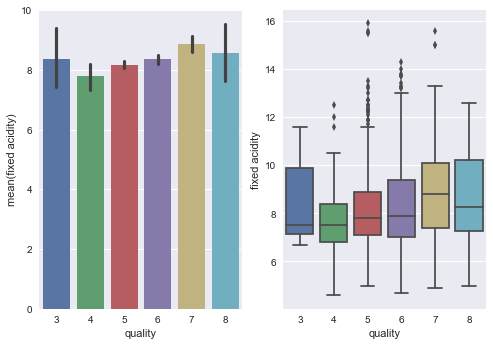

In [12]:
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='fixed acidity', data=df, ax=ax[0])
sns.boxplot(x='quality', y='fixed acidity', data=df, ax=ax[1])
#fig=plt.figure(figsize=(30,20))
#fixed acidity might not be a strong predictor for quality.

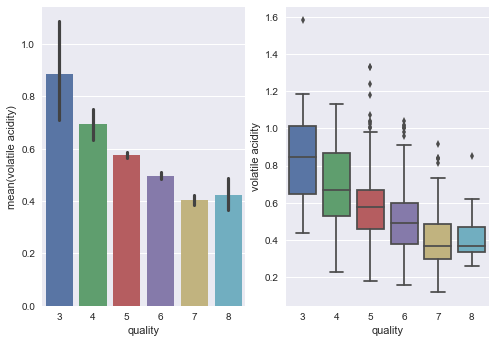

In [13]:
#now lets check if volatile acidity is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='volatile acidity', data=df, ax=ax[0])
sns.boxplot(x='quality', y='volatile acidity', data=df, ax=ax[1])
#volatile acidity seems to be a better predictor of wine quality, with decreasing volatile acidity
#associated with higher wine quality

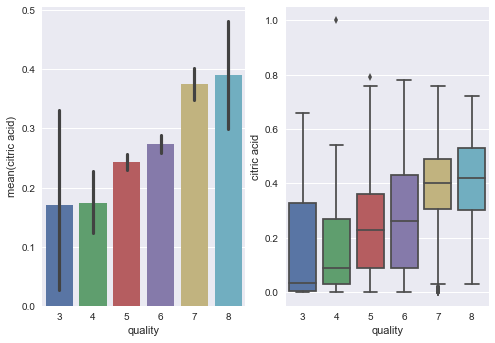

In [14]:
#now lets check if citric acidity is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='citric acid', data=df, ax=ax[0])
sns.boxplot(x='quality', y='citric acid', data=df, ax=ax[1])
#citric acid might be a good predictor, with increasing citric acidity leading to higher wine quality

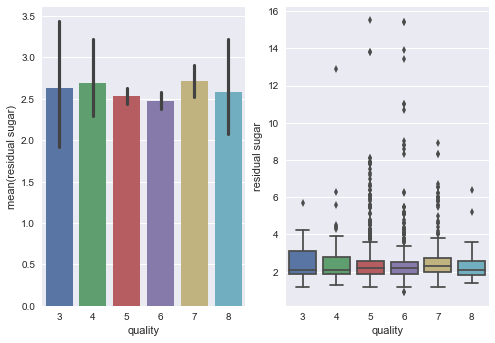

In [15]:
#now lets check if residual sugar is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='residual sugar', data=df, ax=ax[0])
sns.boxplot(x='quality', y='residual sugar', data=df, ax=ax[1])
#not a good predictor

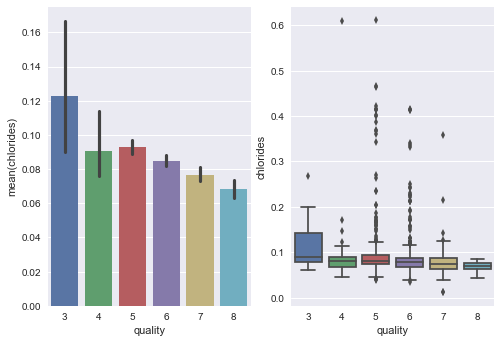

In [16]:
#now lets check if chlorides is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='chlorides', data=df, ax=ax[0])
sns.boxplot(x='quality', y='chlorides', data=df, ax=ax[1])
#possible use as a predictor, some association

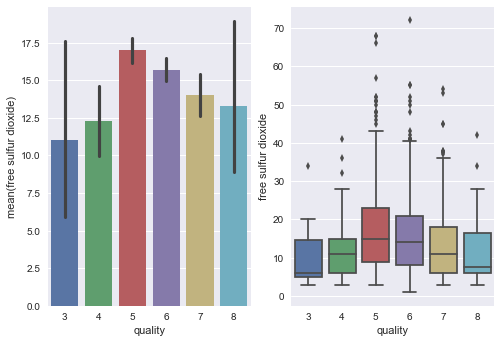

In [17]:
#now lets check if free sulfur dioxide is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='free sulfur dioxide', data=df, ax=ax[0])
sns.boxplot(x='quality', y='free sulfur dioxide', data=df, ax=ax[1])
#looks like could be a good predictor, also seems like non linear

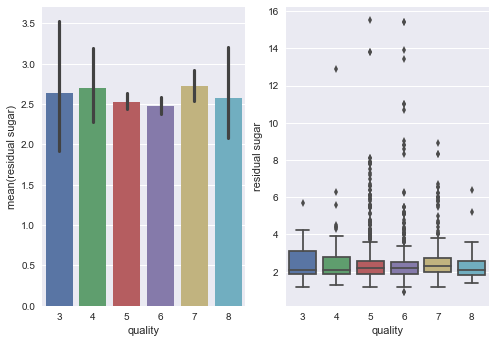

In [18]:
#now lets check if residual sugar is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='residual sugar', data=df, ax=ax[0])
sns.boxplot(x='quality', y='residual sugar', data=df, ax=ax[1])
#looks like could be a good predictor, also seems like non linear.
#check for correlation/covariance with free sulfur dioxide.

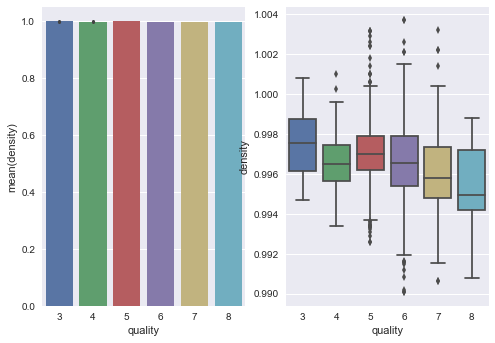

In [19]:
#now lets check if density is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='density', data=df, ax=ax[0])
sns.boxplot(x='quality', y='density', data=df, ax=ax[1])
#might not be good predictor, although might have to normalize around ~1 to check sensitivity

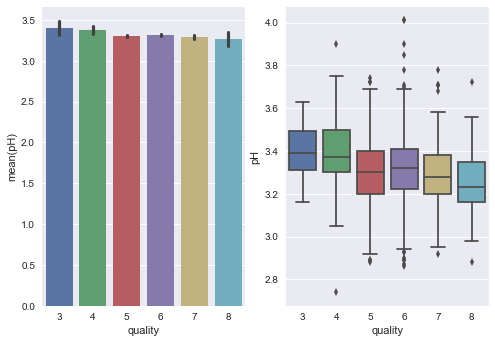

In [20]:
#now lets check if residual sugar is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='pH', data=df, ax=ax[0])
sns.boxplot(x='quality', y='pH', data=df, ax=ax[1])
#looks like could be a good predictor, also seems like non linear.

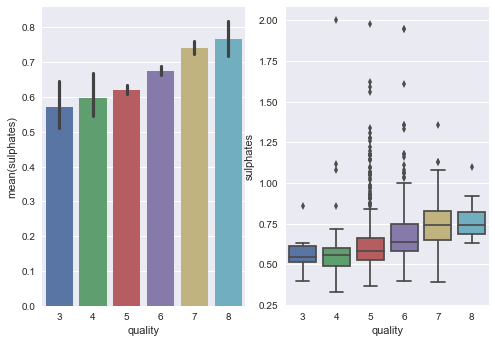

In [21]:
#now lets check if residual sugar is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='sulphates', data=df, ax=ax[0])
sns.boxplot(x='quality', y='sulphates', data=df, ax=ax[1])
#looks like could be a good predictor, also seems like non linear.

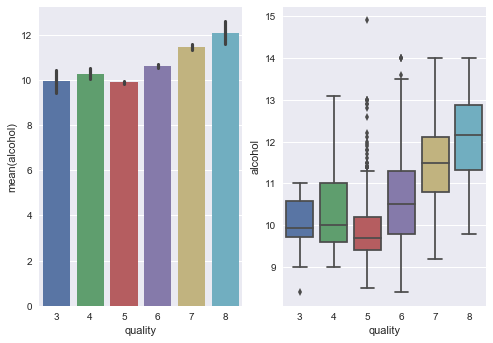

In [22]:
#now lets check if residual sugar is a predictor for quality
fig, ax=plt.subplots(1,2)
sns.barplot(x='quality', y='alcohol', data=df, ax=ax[0])
sns.boxplot(x='quality', y='alcohol', data=df, ax=ax[1])

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [24]:
X = df.drop(['quality'], axis=1)
y = df.quality.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(random_state=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('score: ', model.score(X_test, y_test) * 100)

('score: ', 62.812500000000007)


In [25]:
model.feature_importances_

array([ 0.07568177,  0.10959216,  0.06946822,  0.07515678,  0.07018758,
        0.06566926,  0.1077158 ,  0.09695492,  0.07394554,  0.12102668,
        0.1346013 ])

In [26]:
X = df[['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
y = df.quality.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=1000, 
                               random_state=None, 
                               max_depth=1000, 
                               min_samples_leaf=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)
#running model with 5 most 'important'features...getting the best accuracy here

0.65000000000000002

In [27]:
X = df[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df.quality.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=1000, 
                               random_state=None, 
                               max_depth=1000, 
                               min_samples_leaf=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)
#running model with 4 most correlated features...not as accurate as using top 5 important features

0.66562500000000002

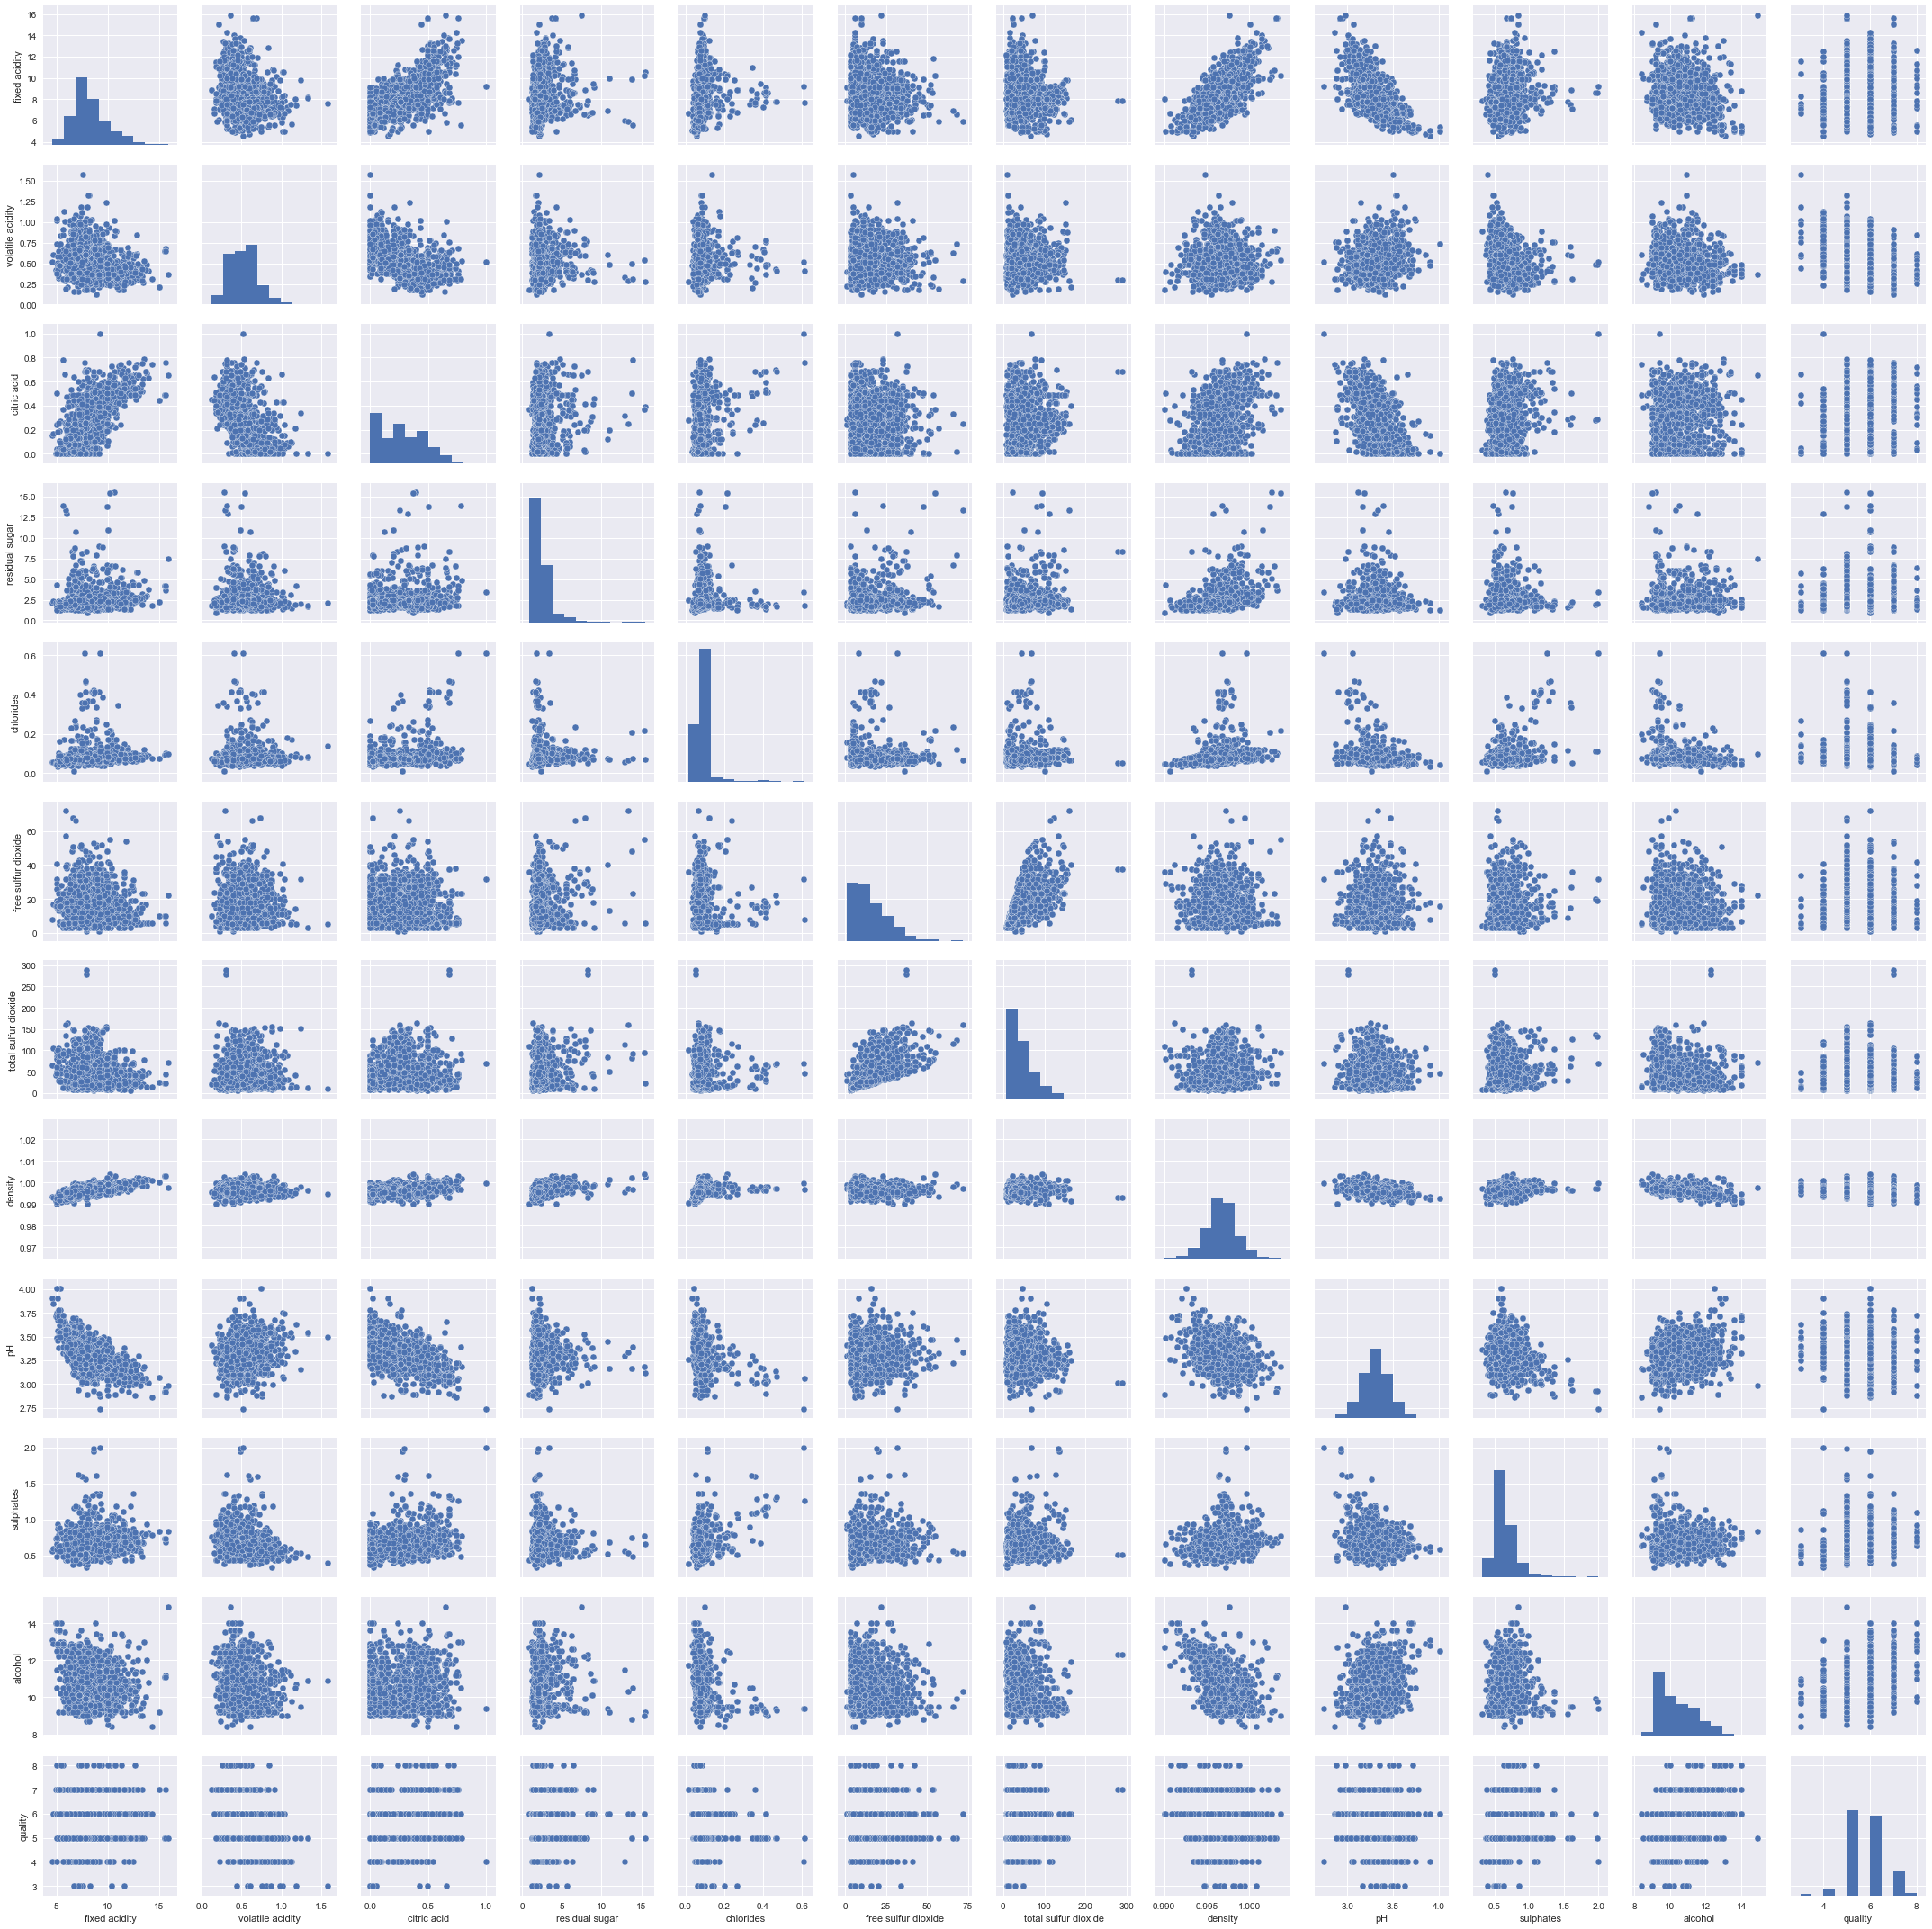

In [28]:
sns.pairplot(df)

In [29]:
#quality_buckets = (3,6,8)
#groups = ['bad', 'good']
df_1 = df.copy()
#df_1['quality']=pd.cut(df_1['quality'], bins=quality_buckets, labels=groups)

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
#use LabelEncoder from sklearn to assign labels to qualities
wine_quality = LabelEncoder()
df_1['quality'] = wine_quality.fit_transform(df_1['quality'])

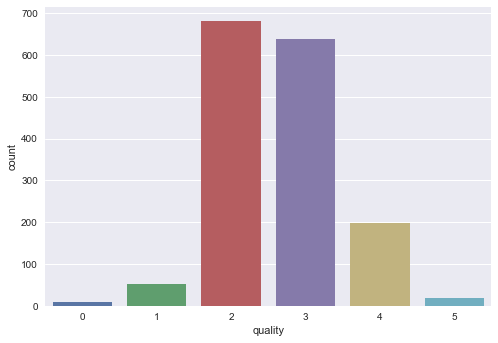

In [32]:
sns.countplot(df_1['quality'])

In [33]:
#df_1['quality'].iloc[df_1['quality'][df_1['quality']=='bad'].index] = 0

In [34]:
df_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


In [35]:
df.isnull().any()
#no null values in any of the predictor columns

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
#fixed acidity, small variance (7.1 25%, 7.9 50%)..good amt outliers. Same w/volatile acidity
#citric acid: very uniform distribution
#residual sugar: min to max has very high delta. Outliers def could be high
#chlorides: also high min to max. Outliers could def be high here too
#free/total sulfur dioxides also follow same pattern

In [38]:
#seperate into response/feature variables
X=df_1.drop('quality',axis=1)
y=df_1['quality']
#train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
#transform
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
#getting an 87% accuracy from Random Classifier

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00        10
          2       0.67      0.77      0.71       130
          3       0.57      0.61      0.59       132
          4       0.52      0.33      0.41        42
          5       0.00      0.00      0.00         5

avg / total       0.57      0.61      0.59       320



/Users/ananth/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
#check confusion matrix
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 100  29   1   0]
 [  0   0  43  81   8   0]
 [  0   0   0  27  14   1]
 [  0   0   0   1   4   0]]


In [41]:
#implement SGD classification model
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))
#84% accuracy using SGD classification model

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00        10
          2       0.54      0.67      0.60       130
          3       0.48      0.28      0.35       132
          4       0.29      0.40      0.34        42
          5       0.00      0.00      0.00         5

avg / total       0.45      0.44      0.43       320



/Users/ananth/anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [42]:
#check confusion matrix
print(confusion_matrix(y_test, pred_sgd))

[[ 0  0  1  0  0  0]
 [ 2  0  5  3  0  0]
 [ 1 15 87 20  7  0]
 [ 2  3 61 37 29  0]
 [ 0  0  8 17 17  0]
 [ 0  0  0  0  5  0]]


In [43]:
#SV classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#85% accuracy using SV classification model

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00        10
          2       0.65      0.75      0.70       130
          3       0.55      0.64      0.59       132
          4       0.56      0.21      0.31        42
          5       0.00      0.00      0.00         5

avg / total       0.56      0.60      0.57       320



In [44]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
data = df.copy()
reviews = []
for i in data['quality']:
    if i >= 3 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 6:
        reviews.append('2')
    elif i >= 7 and i <= 8:
        reviews.append('3')
data['Reviews'] = reviews

In [45]:
from collections import Counter
Counter(data['quality'])


Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18})

In [46]:
Counter(data['Reviews'])

Counter({'1': 63, '2': 1319, '3': 217})

In [47]:
x = data.iloc[:,:11]
y = data['Reviews']
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...,  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ..., -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ..., -0.33117661 -0.04808883
  -0.58477711]
 ..., 
 [-1.1603431  -0.09955388 -0.72391627 ...,  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...,  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...,  0.51112954  0.01092425
   0.54162988]]


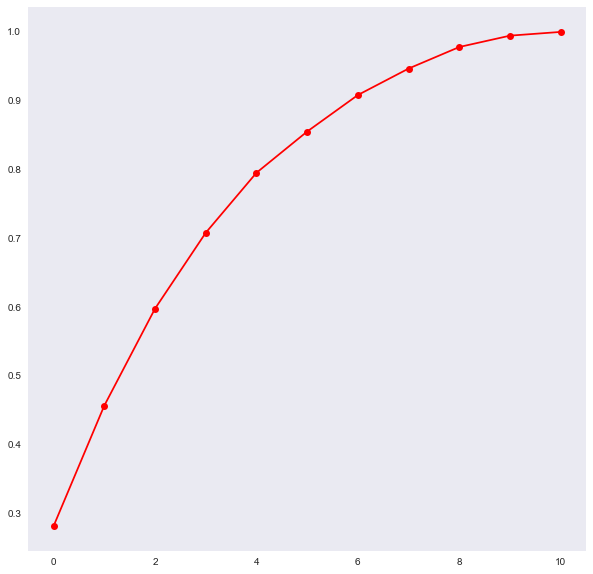

In [48]:
pca = PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [49]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#going to use them all for these prediction models instead of just four.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ..., -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...,  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...,  0.40147313 -0.53955348
   0.59794606]
 ..., 
 [-1.45612897  0.31174559  1.12423941 ..., -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ..., -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ..., -0.49615364  1.18913227
   0.04217568]]


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 8)
(1199,)
(400, 8)
(400,)


In [51]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)
#Getting 84% accuracy with logisitic regression

[[  0  15   0]
 [  0 324  11]
 [  0  32  18]]
85.5


In [52]:
#Decision Tree = DecisionTreeClassifier()
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)
#Slightly less....seeing 80% accuracy with decision tree

[[  3  11   1]
 [ 15 287  33]
 [  4  18  28]]
79.5


In [53]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)
#at 80% accuracy, getting similar type accuracy as Decision Tree

[[  3  12   0]
 [  8 306  21]
 [  1  30  19]]
82.0


In [54]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)
#86% accurau. so far random forest most accurate prediction model

[[  2  13   0]
 [  0 327   8]
 [  0  25  25]]
88.5


In [55]:
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)
#87 accuracy, the best prediction model of the lot

[[  2  13   0]
 [  0 327   8]
 [  0  25  25]]
88.5


In [56]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc=rf.predict(x_test)
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)


[[  2  13   0]
 [  0 327   8]
 [  0  25  25]]
88.5
